![](/pictures/high-tech-programming-office-with-workstations.png)

# Setting Up Your Python Financial Analysis Lab: A Comprehensive Guide

## Introduction

Hello there, finance wizards and coding enthusiasts! Ready to enter the world of Python, Visual Studio, and financial analysis? Let's embark on this journey together. By the end of this guide, you'll have your finance lab primed for dissecting market trends, optimising portfolios, and much more. Buckle up, let's set sail!

## 1. Setting Up Visual Studio and Miniconda

Your coding adventure begins by setting up the primary tools of the trade: Visual Studio Code (VS Code) and Miniconda. VS Code is a robust and versatile code editor, while Miniconda, a mini version of Anaconda, allows us to create isolated Python environments and manage packages.

* Download and install Visual Studio Code from the [official website](https://code.visualstudio.com/). Follow the prompts to complete the installation process.

* Similarly, download and install Miniconda from the [official website](https://docs.conda.io/en/latest/miniconda.html). During installation, ensure that you select the option to "Add Miniconda to my PATH environment variable". This allows you to use `conda` commands directly in the VS Code terminal.

## 2. Setting Up a Python Virtual Environment

With our tools installed, let's now create a virtual environment to house our finance lab. We'll use conda to create a new environment named `finlab` using Python 3.10.

Open VS Code, then open a terminal (Ctrl + `) and type the following command:

```bash
conda create -n finlab python=3.10
```

Activate the `finlab` environment by typing:

```bash
conda activate finlab
```

Inside `finlab`, we install several vital Python libraries for our financial analysis journey:

* **pandas**: A flexible and powerful data manipulation library, essential for handling and processing financial data.

* **matplotlib and seaborn**: Two formidable libraries for data visualisation, because finance isn't just about numbers—it's about insightful charts too!

* **yfinance**: An effective library for fetching historical stock data from Yahoo Finance. 

* **pyportfolioopt**: An advanced library designed to optimise portfolios, calculate risk and returns, and much more.

Install these libraries using the following command:

```bash
conda install pandas matplotlib seaborn yfinance pyportfolioopt
```

## 3. Installing Key Visual Studio Extensions

VS Code shines with its extensions. Here are a few that will make your life easier:

* **Python**: Gives you a host of Python-specific features like linting, debugging, code formatting, and more.

* **Prettier**: A code formatter that supports many languages, including Python. Keeps your code clean and professional.

* **Code Spell Checker**: Like a proof-reader, it catches common spelling mistakes in your code.

You can install these extensions by searching for them in the VS Code Extensions view (`Ctrl + Shift + X`) and clicking on "Install".

## 4. Launching a Jupyter Notebook Inside Visual Studio

With our `finlab` environment and VS Code set up, it's time to dive into some coding. We'll be using a Jupyter Notebook, a powerful tool allowing you to interweave code and text into a single document.

Create a new file with a `.ipynb` extension. Upon creation, VS Code will prompt you to select a Python interpreter—choose the one corresponding to our `finlab` environment.

In the following steps, we'll demonstrate some powerful features of the `pyportfolioopt` library. In this exercise, we'll fetch the historical data of SPY, QQQ, and AGG ETFs using `yfinance`, compute risk and

 return metrics, plot the 10-year cumulative return, and finally, plot the efficient frontier.

*Due to the length and complexity of the code, it has been omitted from this article. For a complete walkthrough, please refer to the official pyportfolioopt [documentation](https://pyportfolioopt.readthedocs.io/en/latest/).*



## Gather the historical data of SPY, QQQ, and AGG ETFs using yfinance

In [1]:
%%capture
import yfinance as yf
import pandas as pd

# Define the ticker list
tickers = ['SPY', 'QQQ', 'AGG']

# Use yfinance to download the historical market data
data = yf.download(tickers, start="2013-06-28", end="2023-06-28")['Adj Close']


## Compute the key risk and return metrics for each ETF

In [2]:
# Calculate the annualized return
returns = data.pct_change().mean() * 252

# Calculate the annualized volatility
volatility = data.pct_change().std() * (252**0.5)

# Print the results
print("Annualized Return:")
print(returns)
print("\nAnnualized Volatility:")
print(volatility)


Annualized Return:
AGG    0.016396
QQQ    0.195212
SPY    0.133962
dtype: float64

Annualized Volatility:
AGG    0.048848
QQQ    0.213633
SPY    0.174720
dtype: float64


## Plot the 10-year cumulated return as a line chart for the 3 ETFs, with the initial value normalized to 100.

<Figure size 1152x768 with 0 Axes>

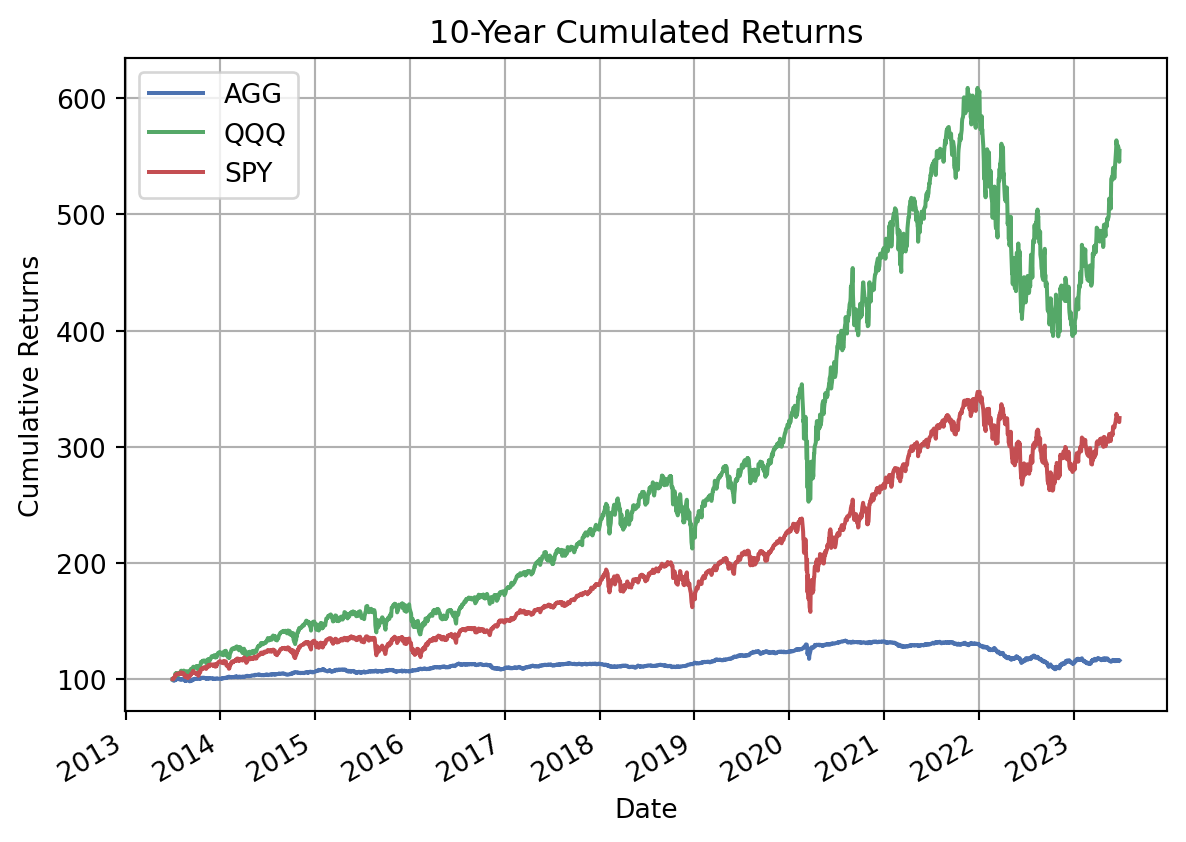

In [3]:
import matplotlib.pyplot as plt

# Calculate the cumulated return
cum_return = (1 + data.pct_change()).dropna().cumprod()

# Normalize to 100
cum_return = 100 * cum_return / cum_return.iloc[0]

# Plot the data
plt.figure(figsize=(12,8))
cum_return.plot();

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('10-Year Cumulated Returns')
plt.legend()
plt.grid(True)
plt.show()


## Use pyportfolioopt to calculate and plot the efficiency frontier

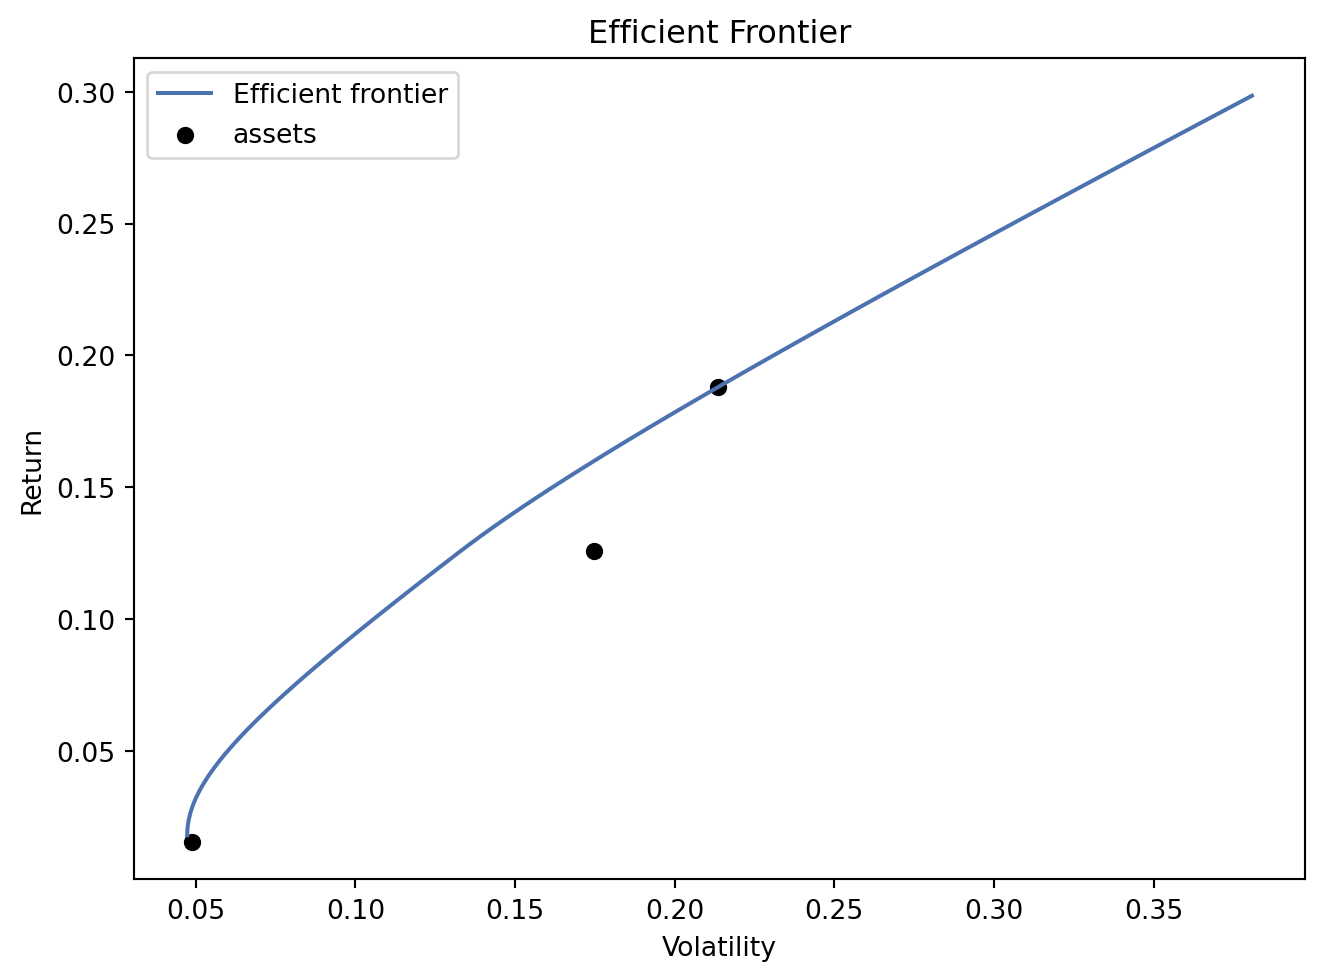

In [4]:
from pypfopt import expected_returns, risk_models
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns and the covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Optimize for the maximal Sharpe ratio
ef = EfficientFrontier(mu, S,weight_bounds=(None, None))

# Plot the efficient frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

plt.title('Efficient Frontier')
plt.show()


## Key Considerations for this Job

In the world of financial analysis, always ensure you understand the data you're dealing with and the calculations you're performing. Never hesitate to go beyond the libraries and tools used here—Python has a vast ecosystem, and there's always more to learn!

Remember, coding and financial analysis are both iterative processes. Keep refining your skills and knowledge, and soon you'll be slicing and dicing financial data like a pro.

**Keywords:** Python, Finance, Financial Analysis, Visual Studio Code, Miniconda, Virtual Environment, pandas, matplotlib, seaborn, yfinance, pyportfolioopt, Jupyter Notebook, Portfolio Optimisation, Risk Metrics, Return Metrics, Efficient Frontier, ETFs.